In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [2]:
#Read data
attr = pd.read_csv('HR+attrition.csv')
attr.head()

,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure
0,Employed,admin,6,0,4,0,high,5
1,Employed,admin,4,0,3,0,medium,6
2,Employed,admin,6,0,2,0,medium,2
3,Employed,admin,2,1,4,0,medium,3
4,Employed,admin,5,0,4,0,medium,3


In [3]:
# Importing Categorical Columns
attr_cust = attr[['Attrition_status', 'department', 'satisfaction', 'filed_complaint', 'projects', 'recently_promoted', 'salary', 'tenure']]
attr_cust.head()

,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure
0,Employed,admin,6,0,4,0,high,5
1,Employed,admin,4,0,3,0,medium,6
2,Employed,admin,6,0,2,0,medium,2
3,Employed,admin,2,1,4,0,medium,3
4,Employed,admin,5,0,4,0,medium,3


In [4]:
# Converting satisfaction into categorical variable.
attr_cust['satisfaction'] = attr_cust['satisfaction'].astype('object',copy=False)

In [5]:
attr_cust.head()

,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure
0,Employed,admin,6,0,4,0,high,5
1,Employed,admin,4,0,3,0,medium,6
2,Employed,admin,6,0,2,0,medium,2
3,Employed,admin,2,1,4,0,medium,3
4,Employed,admin,5,0,4,0,medium,3


In [6]:
attr_cust.shape

(12075, 8)

In [7]:
attr_cust.describe()

,filed_complaint,projects,recently_promoted,tenure
count,12075.000000,12075.000000,12075.000000,12075.000000
mean,0.143188,3.846377,0.021035,3.593292
std,0.350279,1.248489,0.143508,1.515632
min,0.000000,2.000000,0.000000,2.000000
25%,0.000000,3.000000,0.000000,3.000000
50%,0.000000,4.000000,0.000000,3.000000
75%,0.000000,5.000000,0.000000,4.000000
max,1.000000,7.000000,1.000000,10.000000


In [8]:
attr_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12075 entries, 0 to 12074
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Attrition_status   12075 non-null  object
 1   department         12075 non-null  object
 2   satisfaction       12075 non-null  object
 3   filed_complaint    12075 non-null  int64 
 4   projects           12075 non-null  int64 
 5   recently_promoted  12075 non-null  int64 
 6   salary             12075 non-null  object
 7   tenure             12075 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 754.8+ KB


In [9]:
# First we will keep a copy of data
attr_cust_copy = attr_cust.copy()

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
attr_cust = attr_cust.apply(le.fit_transform)
attr_cust.head()

,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure
0,0,1,5,0,2,0,0,3
1,0,1,3,0,1,0,2,4
2,0,1,5,0,0,0,2,0
3,0,1,1,1,2,0,2,1
4,0,1,4,0,2,0,2,1


In [11]:
attr_cust.describe()

,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure
count,12075.000000,12075.000000,12075.00000,12075.000000,12075.000000,12075.000000,12075.000000,12075.000000
mean,0.244306,5.364638,5.65648,0.143188,1.846377,0.021035,1.352381,1.576729
std,0.429693,3.176513,2.53805,0.350279,1.248489,0.143508,0.623621,1.449545
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,4.00000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,0.000000,7.000000,6.00000,0.000000,2.000000,0.000000,1.000000,1.000000
75%,0.000000,8.000000,8.00000,0.000000,3.000000,0.000000,2.000000,2.000000
max,1.000000,9.000000,9.00000,1.000000,5.000000,1.000000,2.000000,7.000000


In [12]:
import sys
!{sys.executable} -m pip install kmodes

## Using KModes Clustering on the data
### Hint: KModes(n_clusters= "Number of clusters", init = "Cao", n_init = 1, verbose=1)

In [13]:
# Importing Libraries

from kmodes.kmodes import KModes
km_cao = KModes(n_clusters=3,init='Cao',n_init=1,verbose=1) #Write your code here
fitClusters_cao = km_cao.fit_predict(attr_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 450, cost: 37904.0


In [14]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(attr_cust)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 45722.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 41503.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 450, cost: 37904.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1287, cost: 34853.0
Run 1, iteration: 2/100, moves: 1588, cost: 34853.0


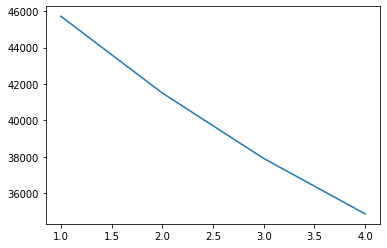

In [15]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [16]:
attr_cust1 = attr_cust_copy.reset_index()
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([attr_cust1, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)
combinedDf.head()

,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure,cluster_predicted
0,Employed,admin,6,0,4,0,high,5,0
1,Employed,admin,4,0,3,0,medium,6,1
2,Employed,admin,6,0,2,0,medium,2,2
3,Employed,admin,2,1,4,0,medium,3,0
4,Employed,admin,5,0,4,0,medium,3,0


In [17]:
# determining the name of the file 
file_name = 'attrition_solution.xlsx'

In [18]:
# saving the excel 
combinedDf.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


# Second Part Solution 

In [19]:
attrCluster = pd.read_excel('attrition_solution.xlsx')

In [20]:
attrCluster.head()

,Unnamed: 0,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure,cluster_predicted
0,0,Employed,admin,6,0,4,0,high,5,0
1,1,Employed,admin,4,0,3,0,medium,6,1
2,2,Employed,admin,6,0,2,0,medium,2,2
3,3,Employed,admin,2,1,4,0,medium,3,0
4,4,Employed,admin,5,0,4,0,medium,3,0


In [21]:
attrCluster.drop('Unnamed: 0',axis=1,inplace=True)

In [22]:
attrCluster.head()

,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure,cluster_predicted
0,Employed,admin,6,0,4,0,high,5,0
1,Employed,admin,4,0,3,0,medium,6,1
2,Employed,admin,6,0,2,0,medium,2,2
3,Employed,admin,2,1,4,0,medium,3,0
4,Employed,admin,5,0,4,0,medium,3,0


In [23]:
attrCluster.Attrition_status.unique()

array(['Employed', 'Left'], dtype=object)

In [24]:
attrCluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12075 entries, 0 to 12074
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Attrition_status   12075 non-null  object
 1   department         12075 non-null  object
 2   satisfaction       12075 non-null  int64 
 3   filed_complaint    12075 non-null  int64 
 4   projects           12075 non-null  int64 
 5   recently_promoted  12075 non-null  int64 
 6   salary             12075 non-null  object
 7   tenure             12075 non-null  int64 
 8   cluster_predicted  12075 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 849.1+ KB


In [25]:
attrCluster.groupby(['cluster_predicted']).Attrition_status.value_counts().unstack()

Attrition_status,Employed,Left
cluster_predicted,,
0,6208,1449
1,716,1331
2,2201,170


DataError: No numeric types to aggregate

# Salary

In [38]:
attrCluster['employed_flag'] = (attrCluster.Attrition_status == 'Employed')*1

In [39]:
attrCluster

,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure,cluster_predicted,employed_flag
0,Employed,admin,6,0,4,0,high,5,0,1
1,Employed,admin,4,0,3,0,medium,6,1,1
2,Employed,admin,6,0,2,0,medium,2,2,1
3,Employed,admin,2,1,4,0,medium,3,0,1
4,Employed,admin,5,0,4,0,medium,3,0,1
...,...,...,...,...,...,...,...,...,...,...
12070,Left,support,8,0,5,0,low,6,0,0
12071,Left,support,9,0,4,0,low,6,0,0
12072,Left,support,9,0,4,0,low,6,0,0
12073,Left,support,9,0,4,0,medium,6,2,0


In [44]:
round(((pd.pivot_table(data=attrCluster,
               index='cluster_predicted',
               columns='salary',
               values='employed_flag'))*100))

salary,high,low,medium
cluster_predicted,,,
0,96.0,75.0,91.0
1,63.0,9.0,44.0
2,98.0,79.0,95.0


In [27]:
round((attrCluster.groupby(["cluster_predicted","salary"]).Attrition_status.value_counts(normalize = True)*100)).unstack()

Attrition_status          Employed  Left
cluster_predicted salary                
0                 high        96.0   4.0
                  low         75.0  25.0
                  medium      91.0   9.0
1                 high        63.0  37.0
                  low          9.0  91.0
                  medium      44.0  56.0
2                 high        98.0   2.0
                  low         79.0  21.0
                  medium      95.0   5.0

In [26]:
attrCluster.groupby(["cluster_predicted","salary"]).Attrition_status.value_counts().unstack()

Attrition_status          Employed  Left
cluster_predicted salary                
0                 high         651    26
                  low         3710  1247
                  medium      1847   176
1                 high          50    29
                  low           47   500
                  medium       619   802
2                 high         210     4
                  low          298    78
                  medium      1693    88

## Salary Analysis:

Cluster 0: 25% of employees who have low salary have left the company.
Cluster 1: 91% of employees who have low salary have left the company.
Cluster 2: 21% of employees who have low salary have left the company.

Conclusion
In cluster 0 (96% of employees) and cluster 2 – (98% of employees) we can observe that employees have high salary are still are retained
Employees who are having low salary in all the three clusters tend to leave the company.

# Projects

In [28]:
attrCluster.groupby(["cluster_predicted","projects"]).Attrition_status.value_counts().unstack()


Attrition_status            Employed   Left
cluster_predicted projects                 
0                 2            472.0  879.0
                  3           1976.0   10.0
                  4           2692.0  249.0
                  5            766.0  214.0
                  6            302.0   71.0
                  7              NaN   26.0
1                 2             34.0  308.0
                  3            526.0   47.0
                  4             50.0   87.0
                  5             54.0  168.0
                  6             52.0  518.0
                  7              NaN  203.0
2                 2            162.0    1.0
                  3            641.0    1.0
                  4            354.0   10.0
                  5            963.0  158.0
                  6             81.0    NaN

In [29]:
round((attrCluster.groupby(["cluster_predicted","projects"]).Attrition_status.value_counts(normalize = True)*100)).unstack()

Attrition_status            Employed   Left
cluster_predicted projects                 
0                 2             35.0   65.0
                  3             99.0    1.0
                  4             92.0    8.0
                  5             78.0   22.0
                  6             81.0   19.0
                  7              NaN  100.0
1                 2             10.0   90.0
                  3             92.0    8.0
                  4             36.0   64.0
                  5             24.0   76.0
                  6              9.0   91.0
                  7              NaN  100.0
2                 2             99.0    1.0
                  3            100.0    0.0
                  4             97.0    3.0
                  5             86.0   14.0
                  6            100.0    NaN

## Project Analysis:

Cluster 0: 100% of the employees left the company when they undertook 7 projects.
                   65% of the employees left the company when they undertook 2 projects.

Cluster 1: 100% of the employees left the company when they undertook 7 projects.
                   90% of the employees left the company when they undertook 2 projects.

We can also observe that employees gradually tend to leave the company as they undertake more projects
64% of employees left the company when they undertook 4 projects
76%% of employees left the company when they undertook 5 projects
91% of employees left the company when they undertook 6 projects

Cluster 2: From the above analysis we can observe that attrition is not dependent on the number of projects for cluster 2. 

Conclusion
In clusters 0 and 1 we can conclude that employees who have worked on 2 projects OR employees who have worked on 4+ projects tend to leave the company. 
But this is not applicable for cluster 2. For cluster 2, attrition is not dependent on number of projects.

   ## Tenure

In [30]:
attrCluster.groupby(["cluster_predicted","tenure"]).Attrition_status.value_counts().unstack()

Attrition_status          Employed   Left
cluster_predicted tenure                 
0                 2         1130.0   16.0
                  3         3182.0  900.0
                  4          867.0   68.0
                  5          359.0  375.0
                  6          287.0   90.0
                  7          133.0    NaN
                  8          103.0    NaN
                  10         147.0    NaN
1                 2           89.0   20.0
                  3           99.0  294.0
                  4          395.0  726.0
                  5           51.0  240.0
                  6           47.0   51.0
                  7            5.0    NaN
                  8           13.0    NaN
                  10          17.0    NaN
2                 2         1201.0    5.0
                  3          401.0    NaN
                  4          229.0    NaN
                  5          147.0  127.0
                  6          110.0   38.0
                  7           44.0    NaN
                  8           33.0    NaN
                  10          36.0    NaN

In [31]:
(round(attrCluster.groupby(["cluster_predicted","tenure"]).Attrition_status.value_counts(normalize = True)*100)).unstack()

Attrition_status          Employed  Left
cluster_predicted tenure                
0                 2           99.0   1.0
                  3           78.0  22.0
                  4           93.0   7.0
                  5           49.0  51.0
                  6           76.0  24.0
                  7          100.0   NaN
                  8          100.0   NaN
                  10         100.0   NaN
1                 2           82.0  18.0
                  3           25.0  75.0
                  4           35.0  65.0
                  5           18.0  82.0
                  6           48.0  52.0
                  7          100.0   NaN
                  8          100.0   NaN
                  10         100.0   NaN
2                 2          100.0   0.0
                  3          100.0   NaN
                  4          100.0   NaN
                  5           54.0  46.0
                  6           74.0  26.0
                  7          100.0   NaN
                  8          100.0   NaN
                  10         100.0   NaN

# Satisfaction

In [32]:
attrCluster.groupby(["cluster_predicted","satisfaction"]).Attrition_status.value_counts().unstack()


Attrition_status                Employed   Left
cluster_predicted satisfaction                 
0                 1                  9.0   67.0
                  2                224.0    7.0
                  3                296.0   23.0
                  4                205.0  361.0
                  5                405.0  484.0
                  6                936.0   46.0
                  7               1055.0   22.0
                  8               1307.0  216.0
                  9                692.0  156.0
                  10              1079.0   67.0
1                 1                  3.0  242.0
                  2                 98.0  502.0
                  3                 35.0   12.0
                  4                 33.0  112.0
                  5                 47.0  201.0
                  6                117.0   36.0
                  7                126.0   19.0
                  8                 66.0   49.0
                  9                 76.0  102.0
                  10               115.0   56.0
2                 1                  7.0    1.0
                  2                 50.0    NaN
                  3                107.0    NaN
                  4                 60.0    NaN
                  5                149.0    NaN
                  6                332.0    NaN
                  7                345.0    2.0
                  8                162.0   17.0
                  9                624.0  138.0
                  10               365.0   12.0

In [33]:
(round(attrCluster.groupby(["cluster_predicted","satisfaction"]).Attrition_status.value_counts(normalize = True)*100)).unstack()

Attrition_status                Employed  Left
cluster_predicted satisfaction                
0                 1                 12.0  88.0
                  2                 97.0   3.0
                  3                 93.0   7.0
                  4                 36.0  64.0
                  5                 46.0  54.0
                  6                 95.0   5.0
                  7                 98.0   2.0
                  8                 86.0  14.0
                  9                 82.0  18.0
                  10                94.0   6.0
1                 1                  1.0  99.0
                  2                 16.0  84.0
                  3                 74.0  26.0
                  4                 23.0  77.0
                  5                 19.0  81.0
                  6                 76.0  24.0
                  7                 87.0  13.0
                  8                 57.0  43.0
                  9                 43.0  57.0
                  10                67.0  33.0
2                 1                 88.0  12.0
                  2                100.0   NaN
                  3                100.0   NaN
                  4                100.0   NaN
                  5                100.0   NaN
                  6                100.0   NaN
                  7                 99.0   1.0
                  8                 91.0   9.0
                  9                 82.0  18.0
                  10                97.0   3.0

# Filed Complaint

In [34]:
attrCluster.groupby(["cluster_predicted","filed_complaint"]).Attrition_status.value_counts().unstack()

Attrition_status                   Employed  Left
cluster_predicted filed_complaint                
0                 0                    5133  1389
                  1                    1075    60
1                 0                     576  1260
                  1                     140    71
2                 0                    1828   160
                  1                     373    10

In [35]:
(round(attrCluster.groupby(["cluster_predicted","filed_complaint"]).Attrition_status.value_counts(normalize = True),2)*100).unstack()

Attrition_status                   Employed  Left
cluster_predicted filed_complaint                
0                 0                    79.0  21.0
                  1                    95.0   5.0
1                 0                    31.0  69.0
                  1                    66.0  34.0
2                 0                    92.0   8.0
                  1                    97.0   3.0